<h1>PROJECT 3: DENGUE</h1>
<h3>ANALYST: ANNE FEDELINO</h3>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dengue = pd.read_csv('datasets\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [5]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')
dengue['Dengue_Cases'] = dengue['Dengue_Cases'].astype('int')
dengue['Dengue_Deaths'] = dengue['Dengue_Deaths'].astype('int')

In [6]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h2>1. What is the Total Dengue cases per region?</h2>

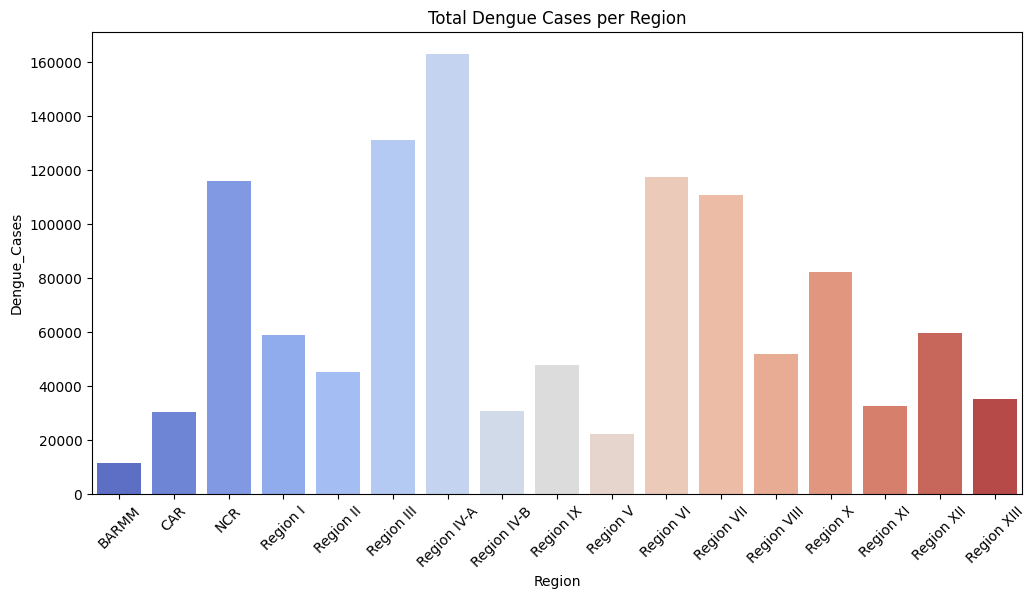

In [78]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum()

region_cases = region_cases.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=region_cases, x='Region', y='Dengue_Cases', palette='coolwarm')
plt.title("Total Dengue Cases per Region")
plt.xticks(rotation=45)
plt.show()

<h3>INSIGHT:</h3>
The graph above shows the regions with the highest bars are likely urbanized or densely populated areas like Region IV-A,Region IV, Region III, andNCR, where mosquitoes thrive due to stagnant water and human activity. The more people living in a small area, the higher the chances that mosquitoes can bite multiple hosts and transmit the virus quickly. This makes dengue transmission more efficient and harder to control in cities and large towns.

<h2>2. which month do dengue cases usually peak?</h2>

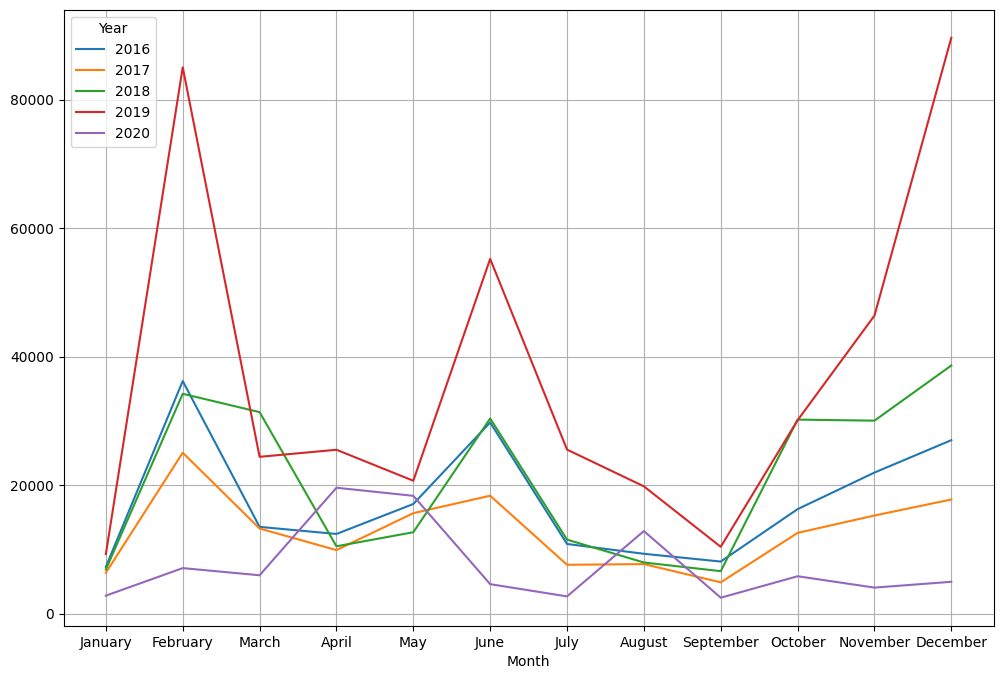

In [7]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

dengue_cases = dengue.groupby([dengue.Month, dengue.Year]) ['Dengue_Cases'].sum()
dengue_cases.unstack().plot()
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h3>INSIGHT:</h3>
This shows dengue cases by month across different years.
In tropical countries like the Philippines, dengue cases often rise sharply during the rainy season, when mosquito breeding sites increase due to stagnant water.
So, the graph typically shows the highest peaks around August sometimes extending from July to September).

<h2>3. How do dengue cases vary throughout the months across different years?</h2>

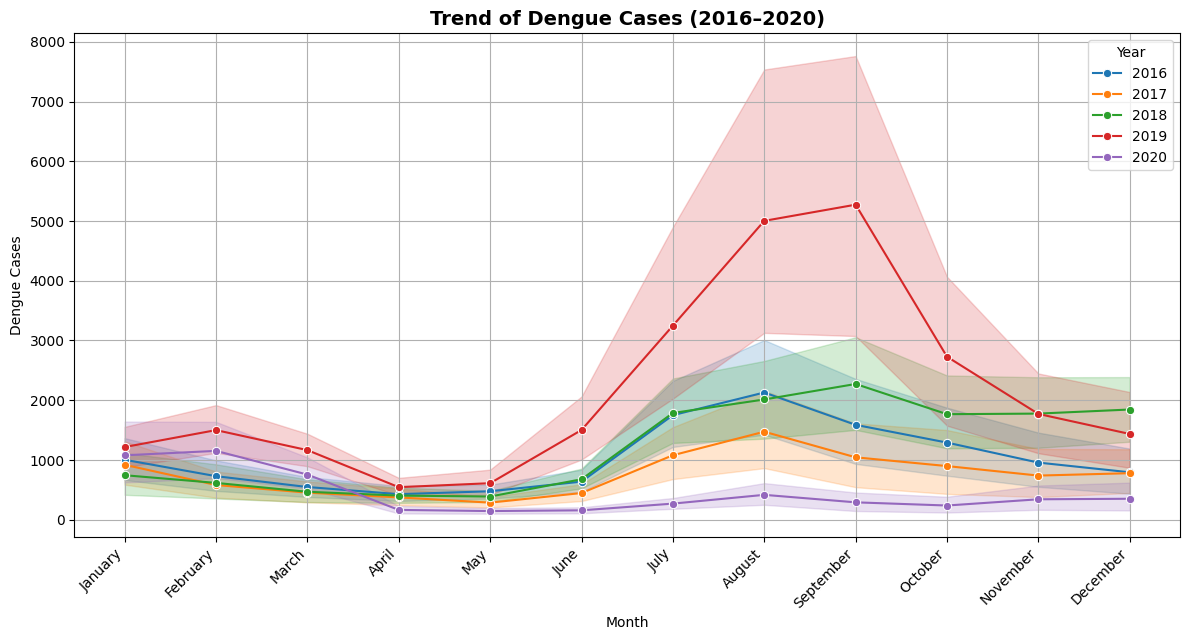

In [21]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.title('Trend of Dengue Cases (2016–2020)', fontsize=14, weight='bold')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

<h3>INSIGHT:</h3>
Dengue cases consistently rise during the rainy months, typically July to September.

This suggests that weather conditions such as increased rainfall and humidity create ideal breeding grounds for mosquitoes, leading to more infections.
After the rainy season, dengue cases usually decrease from October to December.
This decline corresponds to the dry season, when there are fewer stagnant water sources for mosquitoes to breed.

<h3>INSIGHT:</h3>
Some years for example, 2019 may show a higher overall trend in cases compared to others, indicating possible major outbreaks influenced by environmental or health response factors that year.
Despite fluctuations in total numbers, the shape of the trend line is similar each year low at the start of the year, rising mid-year, and dropping toward the end.
This consistency shows that dengue transmission follows a predictable seasonal pattern, which can help in planning prevention campaigns ahead of peak months.

<h2> 4. Monthly cases of dengue in region IV-A</h2>

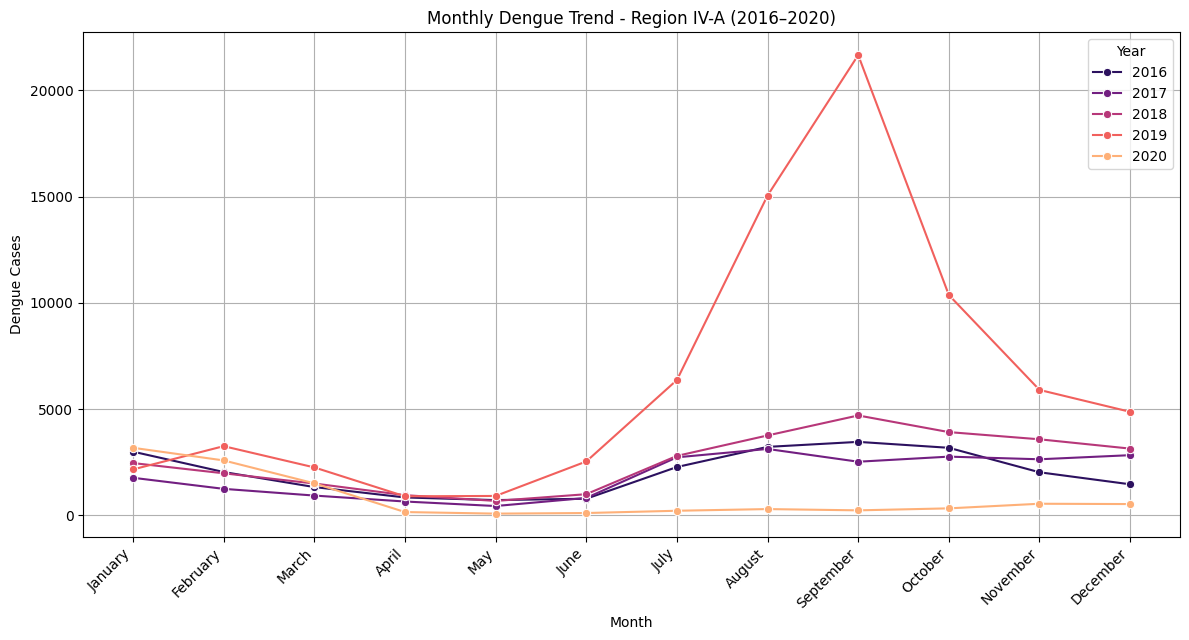

In [26]:
month_order = ['January','February','March','April','May','June', 'July','August','September','October','November','December']

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue[dengue['Region'] == 'Region IV-A'], marker='o', palette='magma')
plt.title('Monthly Dengue Trend - Region IV-A (2016–2020)')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

<h3>INSIGHT:</h3>
Dengue cases in Region IV-A consistently increase from June to September, peaking during the rainy season. This pattern shows the strong link between weather conditions rain, humidity and mosquito breeding, which drives dengue transmission.

The dengue cases start tto decrease on month of October to December each year.The decline aligns with the dry season, where fewer stagnant water sources limit mosquito reproduction.

<h3>INSIGHT:</h3>
One of the years, commonly 2019 shows a significantly higher spike in cases compared to other years.This indicates that Region IV-A experienced a major outbreak during that period, possibly due to climatic factors or lapses in vector control.

The overall trend repeats each year low at the start, rising mid-year, then falling at year-end.This consistency suggests dengue in Region IV-A follows a predictable seasonal cycle, which can help public health officials plan early interventions before the peak months.

<h2>5. Total Dengue cases per year.</h2>

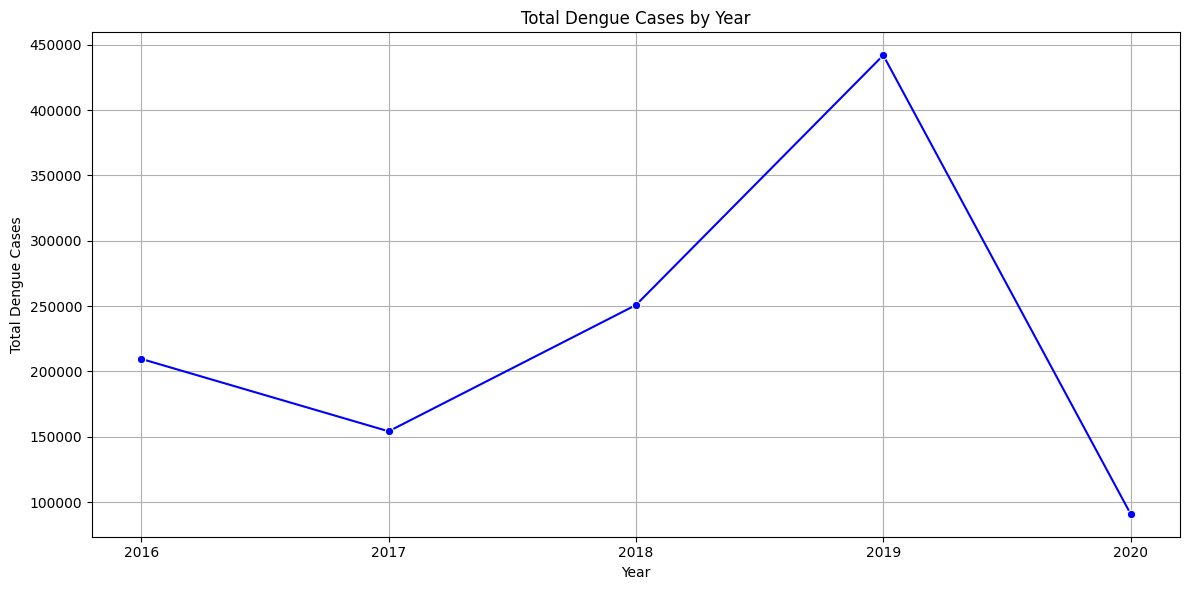

In [56]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_cases, x='Year', y='Dengue_Cases', marker='o', color='blue')
plt.title('Total Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.xticks(yearly_cases['Year'].astype(int))
plt.tight_layout()
plt.show()

<h3>INSIGHT:</h3>
The line graph shows how the total dengue cases changed every year from 2016 to 2020. Some years have higher dengue cases than others, meaning there were more outbreaks during those times. The increase or decrease in cases might be because of changes in weather, mosquito population, or how well people followed dengue prevention measures. This graph helps us see which year had the worst dengue outbreak and when the number of cases started to go down.

<h2>6. Which region recorded the highest total number of dengue deaths?</h2>

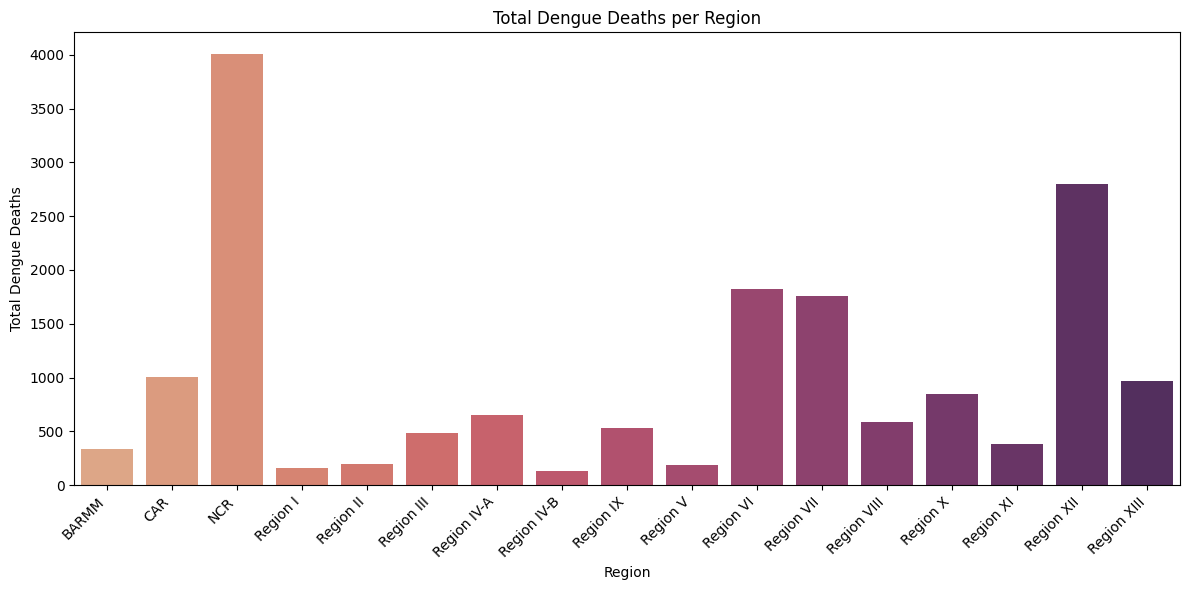

In [63]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=region_deaths, x='Region', y='Dengue_Deaths', palette='flare')

plt.title('Total Dengue Deaths per Region')
plt.xlabel('Region')
plt.ylabel('Total Dengue Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>INSIGGHT:</h3>
The graph shows which regionns have the highest dengue deaths.Some bars are taller, meaning those regions experienced more fatalities compared to others.There are big differences in dengue deaths between regions.This could mean that dengue prevention and control are not equally effective everywhere.

Regions with lower dengue deaths might have better sanitation and health awarenessPeople there may be more active in keeping their surroundings clean and preventing mosquito breeding.The vizualization helps health officials know where to focus their efforts.

<h2>7.Average Dengue Mortality Rate per Year.</h2>

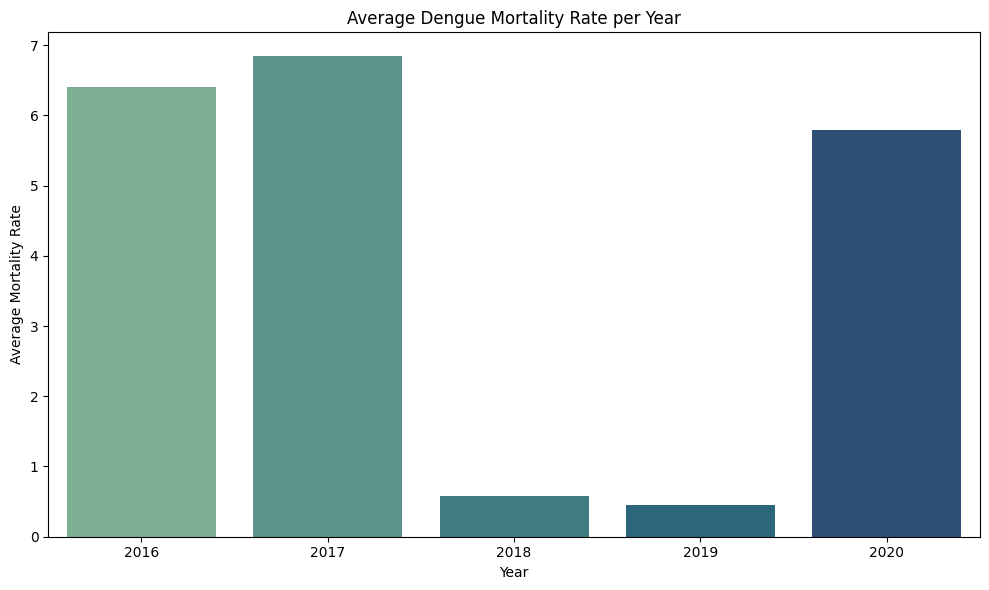

In [67]:
plt.figure(figsize=(10,6))

year_mortality = dengue.groupby('Year')['Mortality_Rate'].mean().reset_index()

sns.barplot(data=year_mortality, x='bYear', y='Mortality_Rate', palette='crest')
plt.title('Average Dengue Mortality Rate per Year')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate')
plt.tight_layout()
plt.show()

<h3>INSIGHT:</h3>
Years with noticeably higher bars might reflect major dengue outbreaks where the healthcare system was overwhelmed, leading to increased death rates despite more reported cases.

<h2>8. which regions consistently show lower mortality rates?</h2>

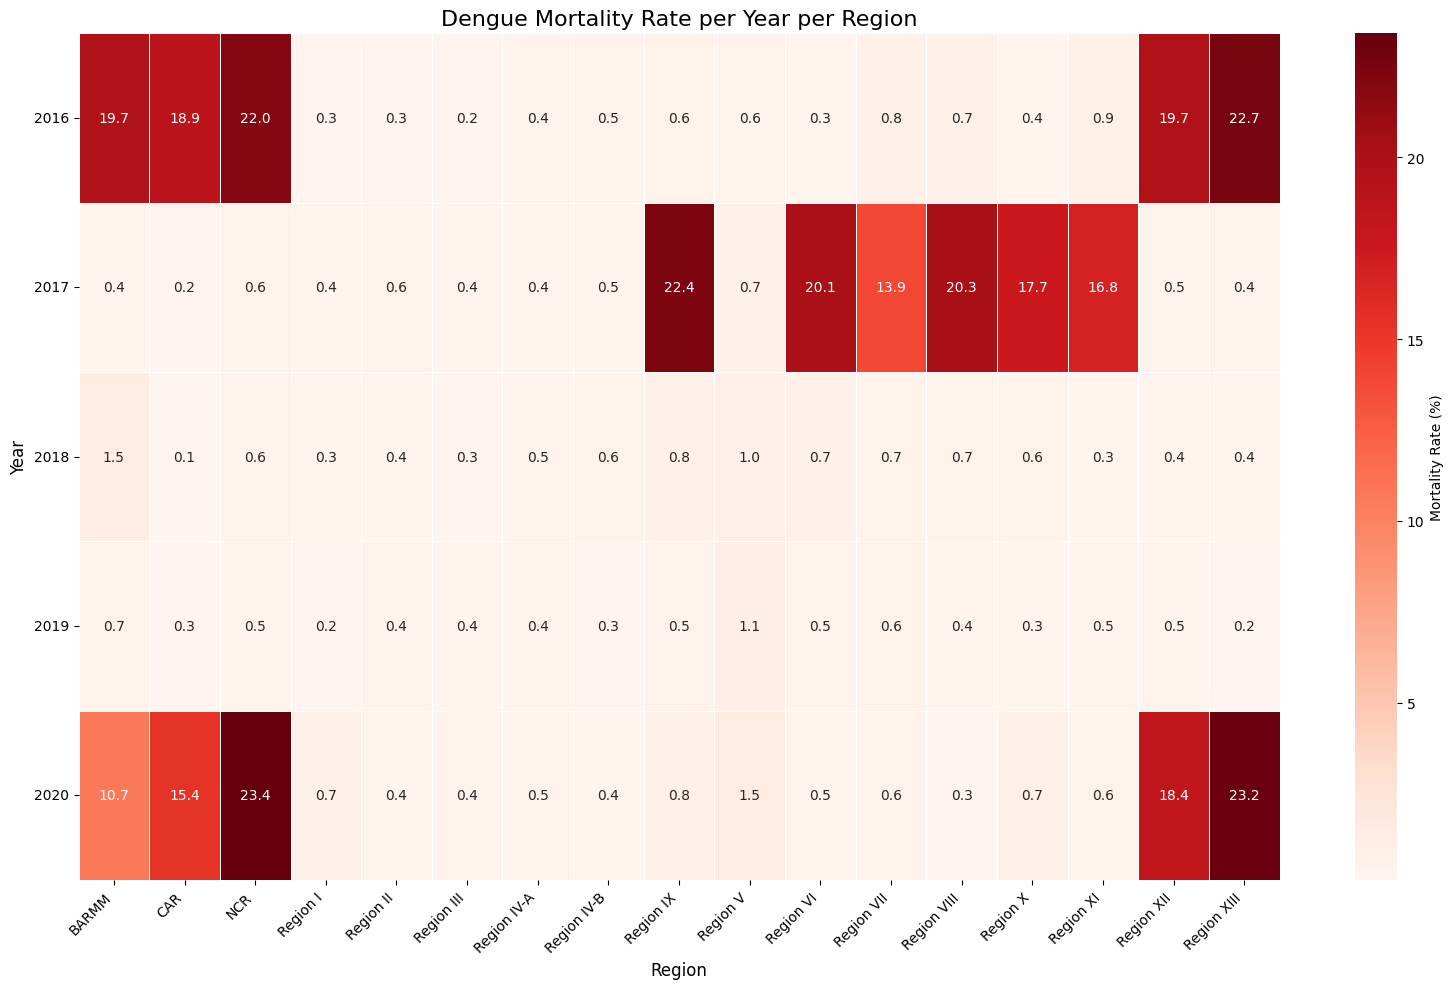

In [27]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) *100

heatmap_data = dengue.groupby(['Year', 'Region']) ['Mortality_Rate'].mean().unstack()

plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

<h3>INsIGHT:</h3>
Some regions show higher mortality rates compared to others, suggesting differences in healthcare access, response time, and disease management. Regions with limited hospital facilities or delayed diagnosis tend to have higher fatality percentages.

Many regions exhibit a gradual decrease in mortality rate over the years.
This could indicate improved dengue awareness, better treatment availability, and effective government interventions like early detection and vector control.

<h3>INSIGHT:</h3>
Certain years show noticeable spikes in mortality rates for some regions, possibly due to major outbreaks that overwhelmed healthcare systems. This pattern highlights how outbreak intensity can directly affect fatality rates, especially when resources are stretched thin.

The contrast in color intensity across regions reveals uneven dengue management effectiveness. Regions with lighter colors maintained low mortality rates, while darker-shaded regions may need stronger medical infrastructure and preventive measures.

<h2>9. Which year recorded the highest number of dengue-related deaths?</h2>

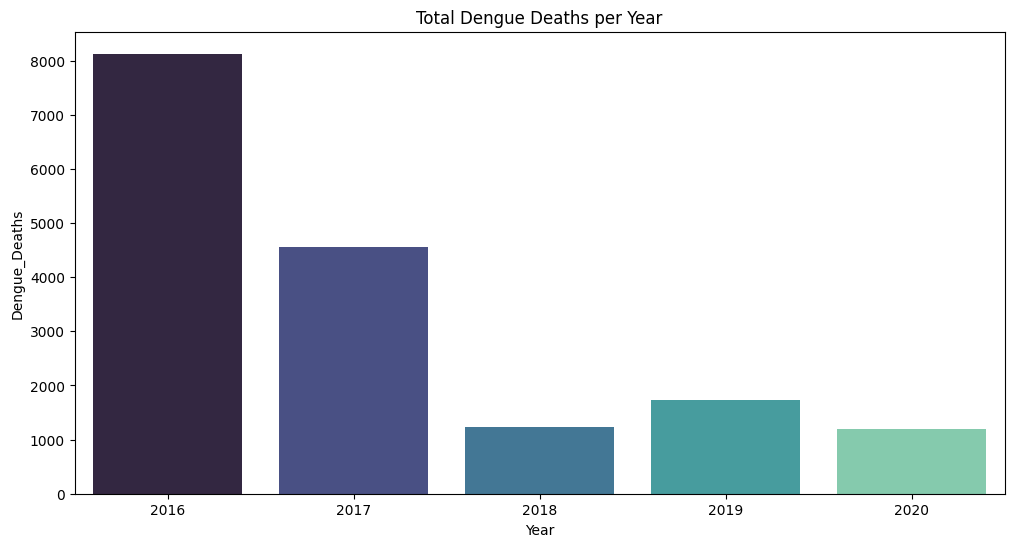

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data=dengue.groupby('Year', as_index=False)['Dengue_Deaths'].sum(), x='Year', y='Dengue_Deaths', palette='mako')
plt.title("Total Dengue Deaths per Year")
plt.show()

<h3>INSIGHT:</h3>
The graph above shows the number of dengue deaths change each year, certain years experienced stronger outbreaks or weaker healthcare responses.
The two higher bar are years likely had major dengue outbreaks, possibly due to environmental factors such as heavy rainfall or poor sanitation.
A declining trend in deaths may indicate improved disease control, faster treatment, or better public awareness whereas a rising trend could signal the opposite.
Tracking total deaths per year helps public health officials identify high-risk years and prepare early interventions, like vector control or awareness campaigns.

<h2>10. Total Denguee Deaths per Region</h2>

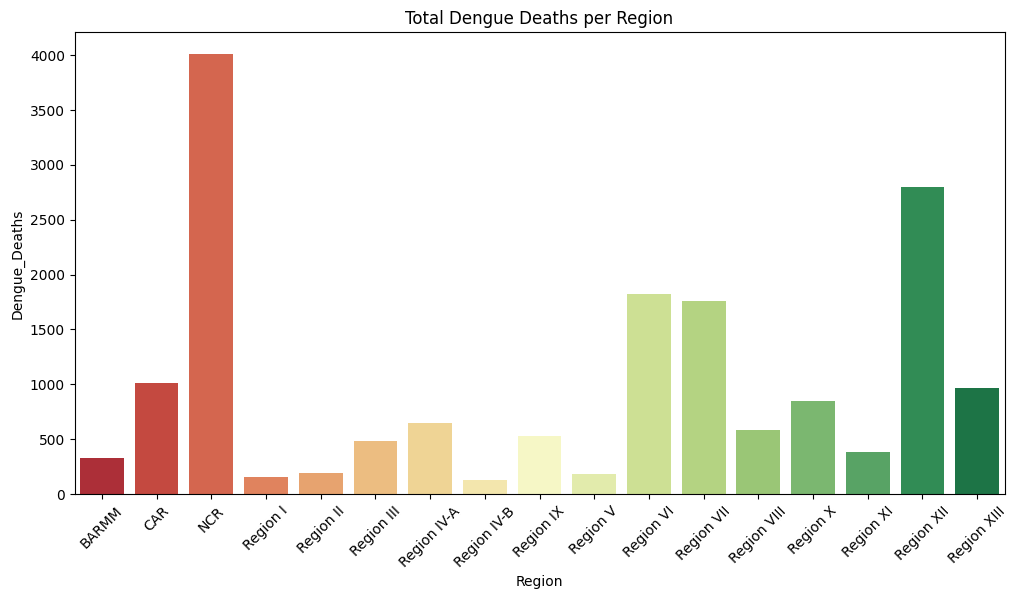

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=dengue.groupby('Region', as_index=False)['Dengue_Deaths'].sum(), x='Region', y='Dengue_Deaths', palette='RdYlGn')
plt.title("Total Dengue Deaths per Region")
plt.xticks(rotation=45)
plt.show()

<h3>INSIGHT: </h3>
Some regions have more dengue deaths than others, which may mean the outbreak was stronger or that healthcare and disease control were not as effective in those areas.
The regions with the highest dengue deaths might have bigger populations, more mosquitoes, or be more urbanized. This shows that these areas need stronger health programs.
Regions with fewer dengue deaths may have done better in preventing dengue through cleanliness, awareness, or faster medical help.
The chart shows which regions need more focus on dengue prevention and information campaigns to avoid more deaths in the future.

<h2>11. Which year recorded the highest total number of dengue cases?</h2>

In [15]:
year_dengoi = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()
year_dengue_cases = year_dengoi.sort_values(by='Dengue_Cases', ascending=False).head()
year_dengue_cases

,Year,Dengue_Cases
3,2019,441902
2,2018,250783
0,2016,209544
1,2017,154155
4,2020,91041


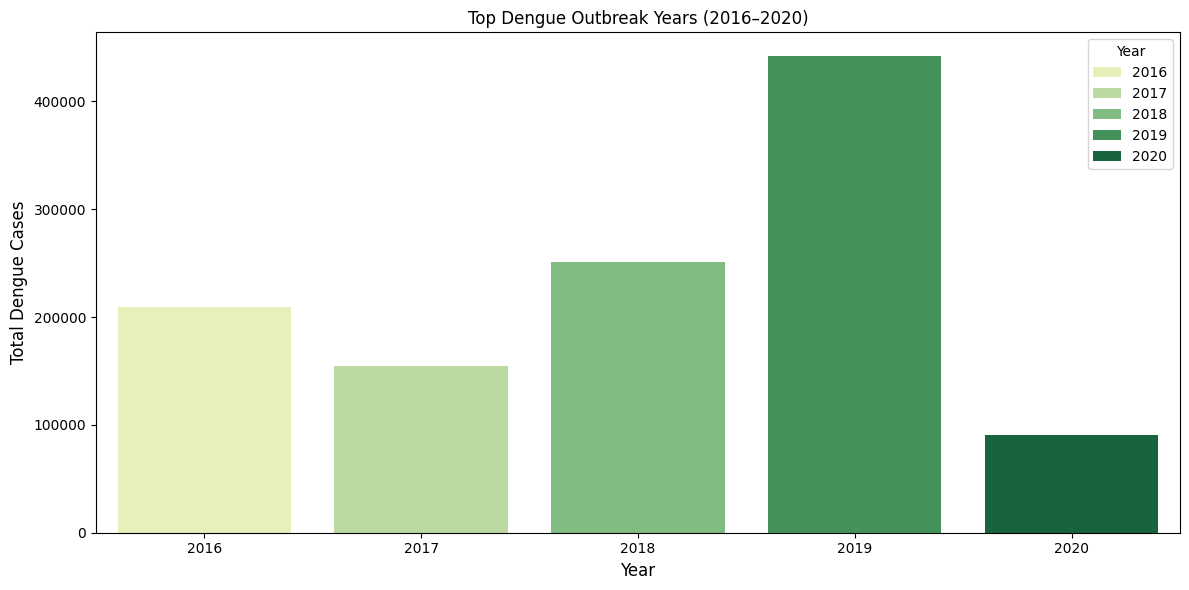

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=year_dengue_cases,x='Year', y='Dengue_Cases',hue='Year', palette='YlGn', dodge=False)

plt.title('Top Dengue Outbreak Years (2016–2020)')
plt.ylabel('Total Dengue Cases', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

<h3>INSIGHT:</h3>
This shows that some years had a much higher number of dengue cases compared to others, meaning outbreaks were more severe during those times.
The year with the tallest bar represents the period when dengue cases peaked, showing when the disease was most widespread.
Years with fewer dengue cases may suggest better prevention efforts, weather conditions less favorable for mosquitoes, or improved public awareness.
This pattern helps identify which years dengue outbreaks were worst, giving health authorities clues on when to strengthen dengue control programs.

<h2>12. what can be observed about dengue mortality trends across different regions from 2016 to 2020?</h2>

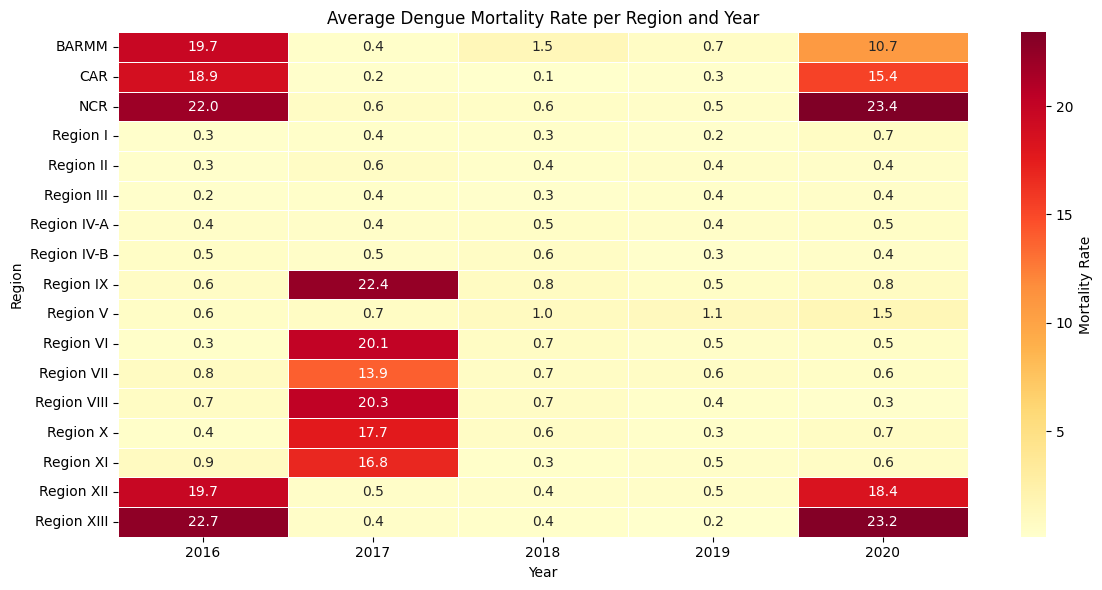

In [38]:
plt.figure(figsize=(12,6))

heatmap_data = dengue.pivot_table(index='Region', columns='Year',values='Mortality_Rate',aggfunc='mean')

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlOrRd', linewidths=.5, cbar_kws={'label': 'Mortality Rate'})
plt.title('Average Dengue Mortality Rate per Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

<h3>INSIGHT:</h3>
The heatmap shows that some regions consistently have darker shades, meaning higher average mortality rates.These areas may face limited access to hospitals, delayed treatment, or weaker dengue prevention programs compared to other regions.

Regions like NCR and Region IV-A may show lower mortality rates despite having high dengue cases, indicating better medical infrastructure and rapid response systems.rural regions with lighter health coverage may experience higher mortality even with fewer total cases.

<h2>13, Which regions experienced the highest and lowest number of dengue cases across different months? </h2>

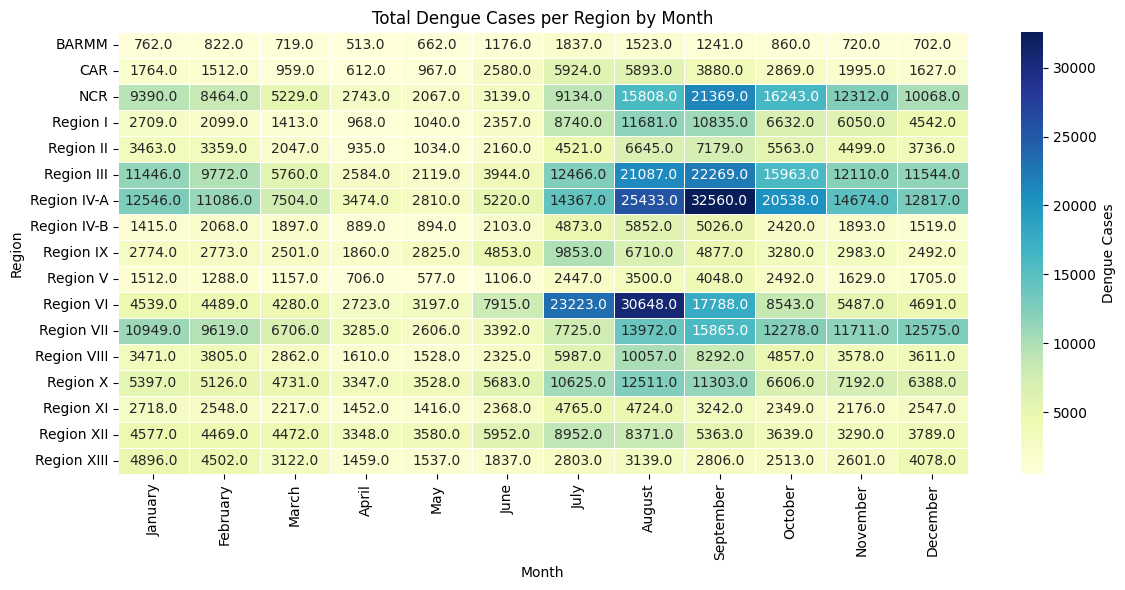

In [44]:
plt.figure(figsize=(12,6))

heatmap_data2 = dengue.pivot_table(index='Region',columns='Month',values='Dengue_Cases',aggfunc='sum')

sns.heatmap(heatmap_data2, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Dengue Cases'})
plt.title('Total Dengue Cases per Region by Month')
plt.xlabel('Month')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

<h3>INSIGHT:</h3>
TThe heatmap shows darker shades between July and September, which aligns with the rainy season in the Philippines. During these months, stagnant water becomes common, creating ideal breeding sites for mosquitoes and causing dengue cases to surge.

<h2>14. The correlation dengue variables</h2>

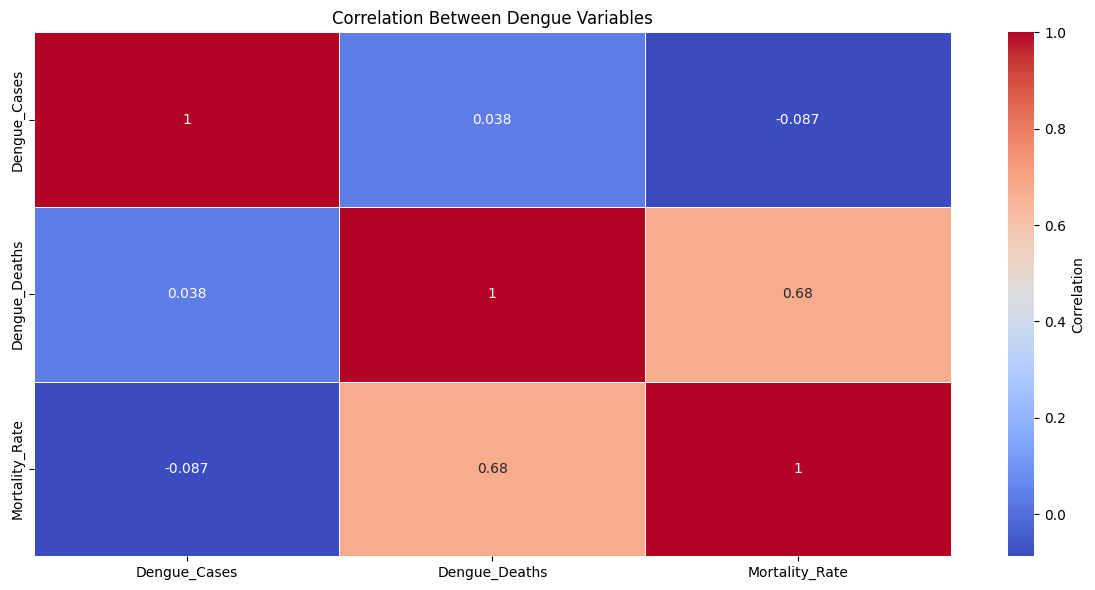

In [42]:
plt.figure(figsize=(12,6))

dengoi_corr = dengue[['Dengue_Cases', 'Dengue_Deaths', 'Mortality_Rate']].corr()

sns.heatmap(dengoi_corr, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.tight_layout()
plt.show()

<h2>15. Average Dengue Cases per Month (2016–2020)</h2>

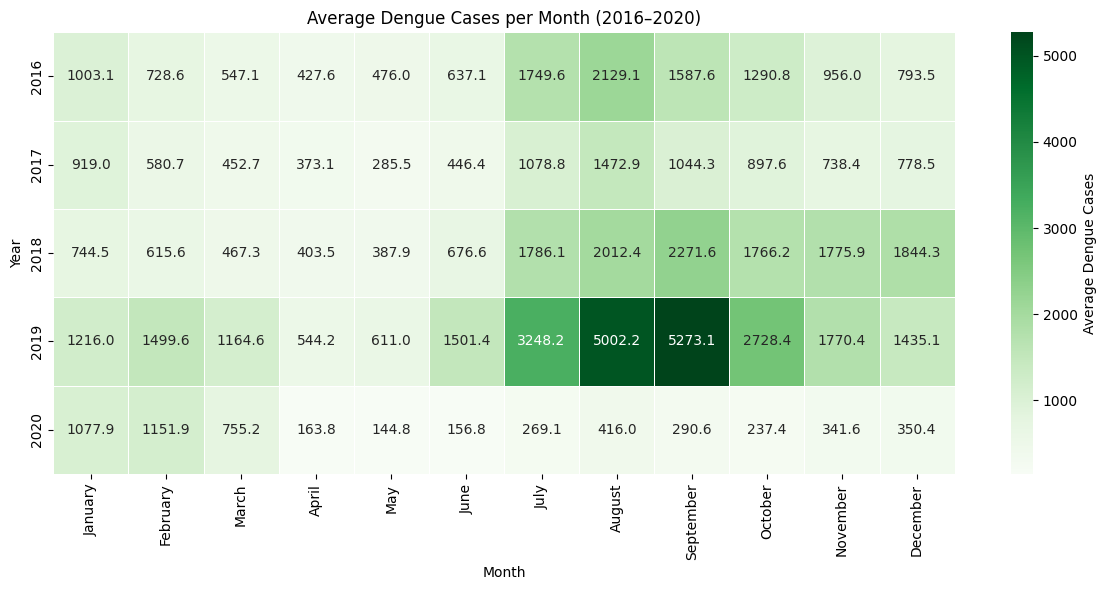

In [75]:
plt.figure(figsize=(12,6))

heatmap_data3 = dengue.pivot_table(index='Year',columns='Month',values='Dengue_Cases',aggfunc='mean')

sns.heatmap(heatmap_data3, annot=True, fmt=".1f", cmap='Greens', linewidths=.5, cbar_kws={'label': 'Average Dengue Cases'})
plt.title('Average Dengue Cases per Month (2016–2020)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

<h3>INSIGHT:</h3>
The heatmap shows that the same months repeatedly have higher averages, suggesting a predictable seasonal trend.

In the year 2019, the months of August and September have darker shades, indicating that dengue outbreaks were more widespread and severe during that period. This can be linked to climatic anomalies, weakened mosquito control programs, or virus strain variations.

The heatmap also shows that 2020 has lighter shades, which may reflect better dengue management, possibly due to enhanced awareness, early diagnosis, and community participation in mosquito control efforts.